## CHAT BOT



**Key Points:**

- Our chatbot uses machine learning to understand user intents and provide tailored responses.
- With advanced NLP techniques, the chatbot comprehends user queries and delivers precise and context-aware responses.
- It accurately classifies user messages into specific categories to understand their needs and respond accordingly.
- Our chatbot is scalable, accessible, and can be deployed across various scenarios and channels.
- It seamlessly integrates with existing systems and APIs, enhancing its capabilities and utility.




## 2. Data Collection and Understanding:

### Data Source:
The dataset consists of user queries (patterns) and corresponding chatbot responses, categorized into different intents. This data is manually collected and structured to train the machine learning model.

### Dataset Overview:
- **Features:** Training sentences (user queries)
- **Target Variable:** Training labels (intents)
- **Challenges:** Limited dataset size, potential class imbalance, and the need for effective preprocessing.


## **Libraries**


In [1]:
import matplotlib.pyplot as plt
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)


C:\Users\Abdul Rehman Qureshi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**tensorflow.keras:** This library is used to import the Keras API of TensorFlow. Keras is a high-level neural network library that runs on top of TensorFlow. With the help of this library, we can easily build and **train neural network models using functions and classes.**

**tensorflow.keras.models:** This module contains the Sequential class, which represents a linear stack of layers. In our chatbot, we can use this class to build a sequential model where the output of one layer becomes the input of the next layer.

**tensorflow.keras.layers:** This module imports the Dense, Embedding, and GlobalAveragePooling1D layers. These layers define different parts of neural network models. The Dense layer is a fully connected layer. The Embedding layer is used to convert text data into numerical representations. The GlobalAveragePooling1D layer is used to capture the global context by averaging spatial dimensions.

**tensorflow.keras.preprocessing.text:** This module provides functions to preprocess text data. In our chatbot, we imported the Tokenizer class, which is used to divide text into tokens and convert them into numerical sequences.

**tensorflow.keras.preprocessing.sequence:** In this module, the pad_sequences function is imported. This function pads sequences to a fixed length. It is used to normalize the length of text sequences in our chatbot.

**sklearn.preprocessing:** This module is part of the scikit-learn library. It includes the LabelEncoder class, which is imported. The LabelEncoder is used to convert categorical labels into numeric form. In our chatbot, we used LabelEncoder to encode the labels of the training data.

# **Acessing intents File**

In [2]:
with open('Queries.json') as file:
    data = json.load(file)

## Task 3: Missing Values

In [3]:
import pandas as pd
pd.DataFrame(data).isnull().sum()

intents    0
dtype: int64

This code block opens and reads the contents of the intents.json file, which contains the training data for the chatbot.


In [4]:
training_sentences = []
training_labels = []
labels = []
responses = []

These empty lists will be used to store the training sentences, training labels, unique labels, and responses for the chatbot.


In [5]:
intents_data = data['intents']

for intent_data in intents_data:
    intent = intent_data['intent']
    text_data = intent_data['text']
    responses_data = intent_data['responses']

    
    for pattern in text_data:
        training_sentences.append(pattern)
        training_labels.append(intent)

    
    responses.append(responses_data)

    
    if intent not in labels:
        labels.append(intent)

    
    extension_data = intent_data['extension']['function']
    entities_data = intent_data['extension']['entities']
    extension_responses_data = intent_data['extension']['responses']
    context_in_data = intent_data['context']['in']
    context_out_data = intent_data['context']['out']
    context_clear_data = intent_data['context']['clear']
    entities_data = intent_data['entities']

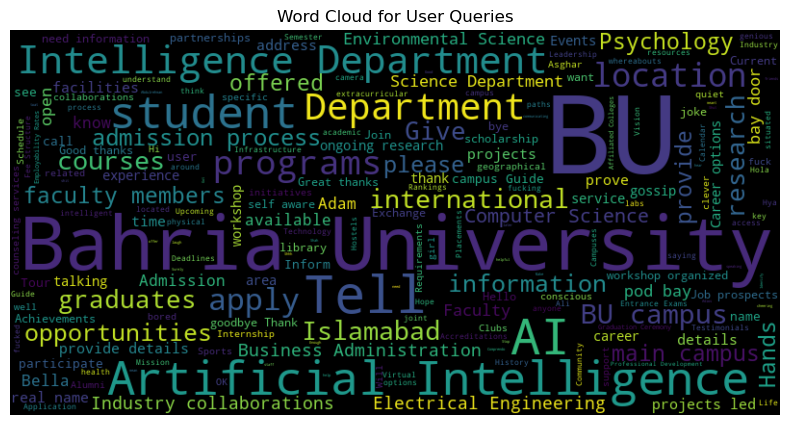

In [6]:
from wordcloud import WordCloud
# Combine the training sentences into a single string for word cloud
queries_combined = ' '.join(training_sentences)

# Generate a word cloud for user queries
wordcloud_queries = WordCloud(width=800, height=400, background_color='black').generate(queries_combined)

# Display the word cloud for user queries using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_queries, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for User Queries')
plt.show()

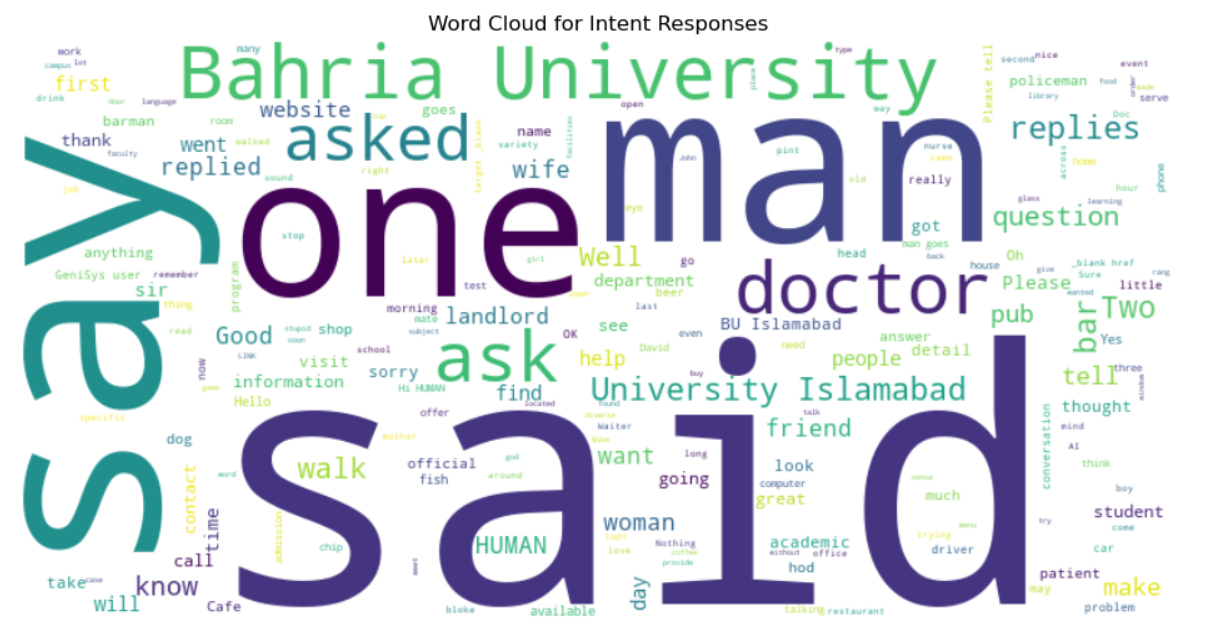

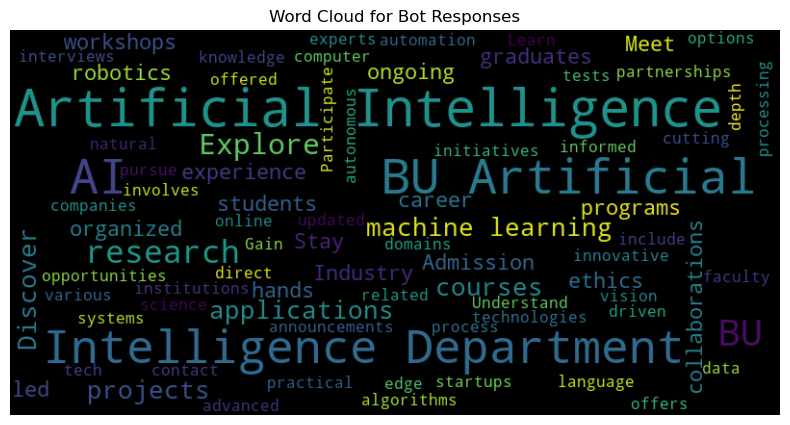

In [7]:
# Combine the responses into a single string for word cloud
responses_combined = ' '.join(responses_data)

# Generate a word cloud for bot responses
wordcloud_responses = WordCloud(width=800, height=400, background_color='black').generate(responses_combined)

# Display the word cloud for bot responses using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_responses, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Bot Responses')
plt.show()

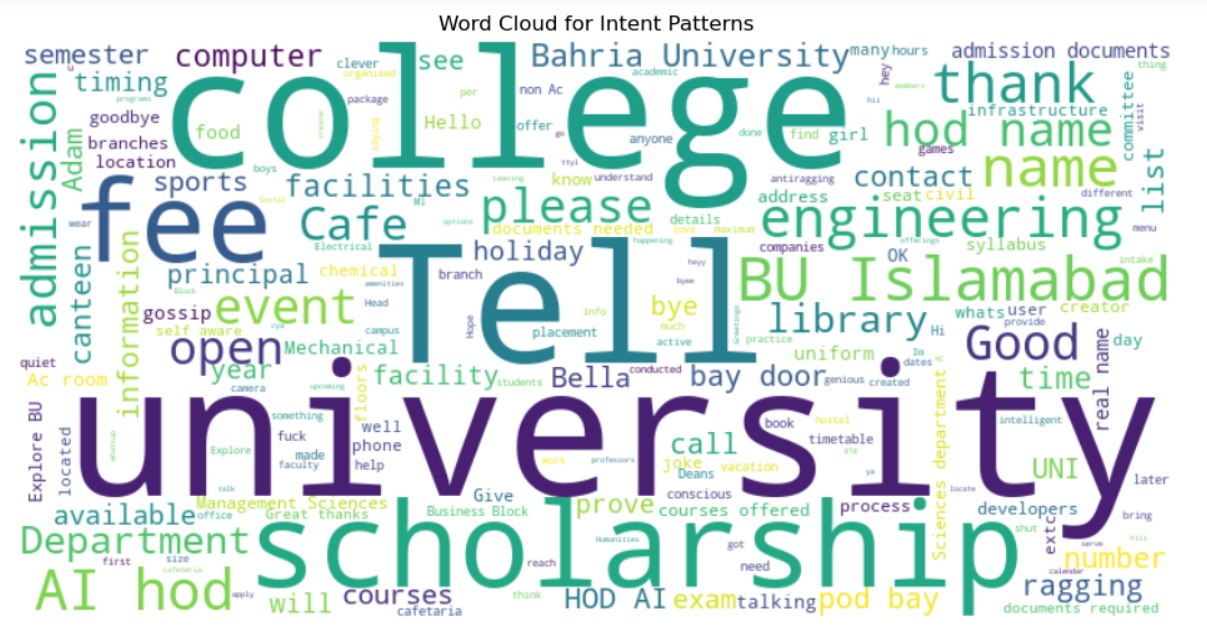

## Task 4: Data Types

In [8]:
import numpy as np

# Convert 'training_labels' to a numpy array
training_labels = np.array(training_labels)

# Check the data type again
print(f'Data type of training_labels: {type(training_labels)}')

Data type of training_labels: <class 'numpy.ndarray'>


In [9]:
unique_values, counts = np.unique(training_labels, return_counts=True)
label_counts = dict(zip(unique_values, counts))

print("Label Counts:")
label_counts

Label Counts:


{'Clever': 7,
 'CourtesyGoodBye': 6,
 'CourtesyGreeting': 7,
 'CourtesyGreetingResponse': 8,
 'CurrentHumanQuery': 7,
 'GoodBye': 4,
 'Gossip': 6,
 'Greeting': 7,
 'GreetingResponse': 12,
 'Jokes': 8,
 'NameQuery': 6,
 'NotTalking2U': 7,
 'PodBayDoor': 7,
 'PodBayDoorResponse': 7,
 'RealNameQuery': 7,
 'SelfAware': 7,
 'Shutup': 7,
 'Swearing': 9,
 'Thanks': 6,
 'TimeQuery': 7,
 'UnderstandQuery': 6,
 'WhoAmI': 6,
 'about_university': 9,
 'admissions': 18,
 'artificial': 10,
 'bu_info_queries': 98,
 'business': 10,
 'campus': 10,
 'computer': 10,
 'electrical': 10,
 'environmental': 10,
 'faculty_information': 4,
 'intelligence': 80,
 'international_programs': 10,
 'location': 53,
 'psychology': 10,
 'student_support_services': 10}

This loop iterates over the intents in the intents.json data. It extracts the patterns (training sentences) and the corresponding tags (training labels) from each intent and appends them to the respective lists. It also collects the unique tags and stores them in the labels list. The responses for each intent are also collected and stored in the responses list.



In [10]:
num_classes = len(labels)

In [11]:
num_classes

37

The num_classes parameter represents the number of unique labels in the label list. It determines the number of intents that the model needs to predict. Each unique label corresponds to a distinct class. The value of num_classes helps in designing the model architecture for accurate classification and generating appropriate responses for each intent.

In [12]:
labels

['Greeting',
 'GreetingResponse',
 'CourtesyGreeting',
 'CourtesyGreetingResponse',
 'CurrentHumanQuery',
 'NameQuery',
 'RealNameQuery',
 'TimeQuery',
 'Thanks',
 'NotTalking2U',
 'UnderstandQuery',
 'Shutup',
 'Swearing',
 'GoodBye',
 'CourtesyGoodBye',
 'WhoAmI',
 'Clever',
 'Gossip',
 'Jokes',
 'PodBayDoor',
 'PodBayDoorResponse',
 'SelfAware',
 'about_university',
 'admissions',
 'faculty_information',
 'location',
 'student_support_services',
 'international_programs',
 'bu_info_queries',
 'campus',
 'computer',
 'electrical',
 'business',
 'environmental',
 'psychology',
 'artificial',
 'intelligence']

## Task 5: Encoding Categorical Variables using LabelEncoder

In [13]:

#lbl_encoder is object of LabelEncoder.
lbl_encoder = LabelEncoder()

#lbl_encoder is used to understand the unique labels in the training data and map them to numerical values.
lbl_encoder.fit(training_labels)

#training labels (tags) are being converted into numerical form.
training_labels = lbl_encoder.transform(training_labels)


In [14]:
training_labels

array([ 7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4, 10, 10, 10, 10, 10, 10, 14, 14, 14, 14,
       14, 14, 14, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 11,
       11, 11, 11, 11, 11, 11, 20, 20, 20, 20, 20, 20, 16, 16, 16, 16, 16,
       16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17,  5,  5,  5,  5,  1,  1,
        1,  1,  1,  1, 21, 21, 21, 21, 21, 21,  0,  0,  0,  0,  0,  0,  0,
        6,  6,  6,  6,  6,  6,  9,  9,  9,  9,  9,  9,  9,  9, 12, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15,
       15, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 31, 31, 31, 31, 34, 34,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 34

The LabelEncoder object is used to understand the unique labels in the training data and map them to numerical values. After this process, the LabelEncoder object is prepared based on the training data and ready to convert categorical labels into numerical form using the transform() function.

## Task 6 & 7: Exploratory Data Analysis and Visualization

C:\Users\Abdul Rehman Qureshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


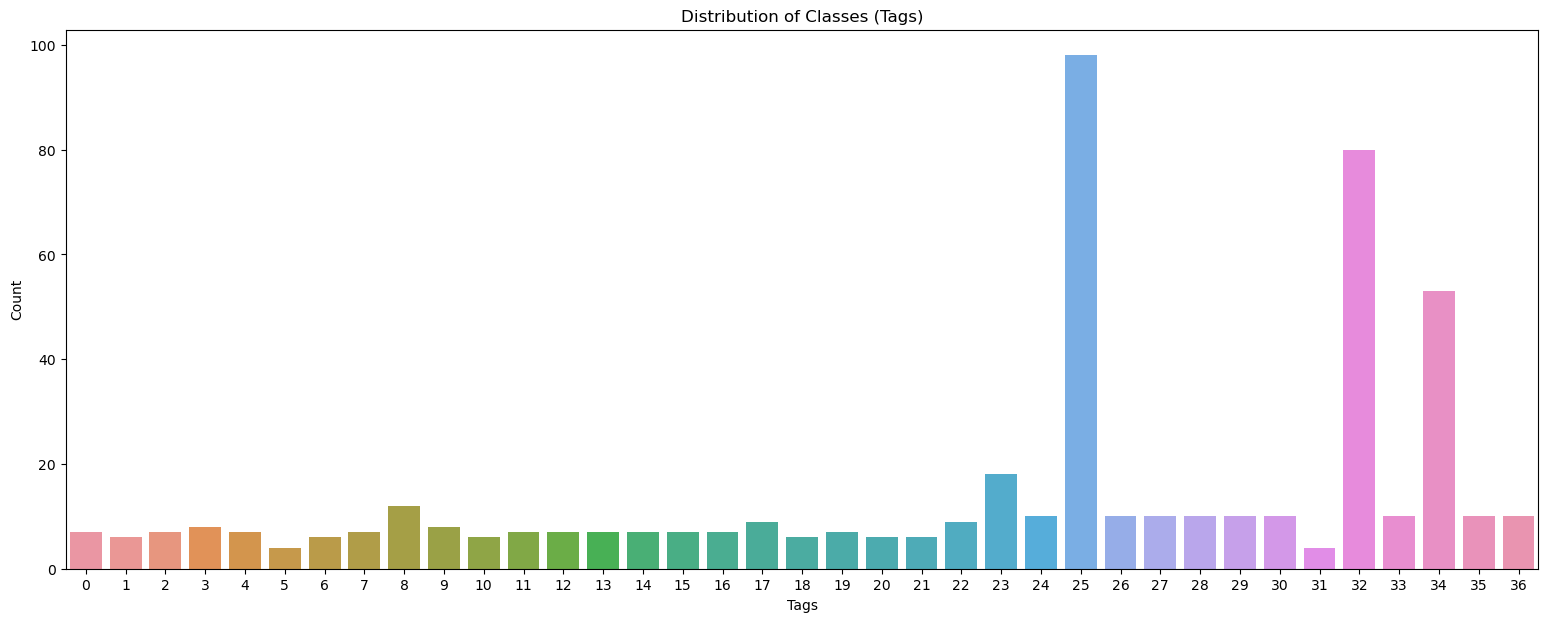

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of classes (tags)
plt.figure(figsize=(19,7))
sns.countplot(training_labels)
plt.title('Distribution of Classes (Tags)')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()



# Embedding

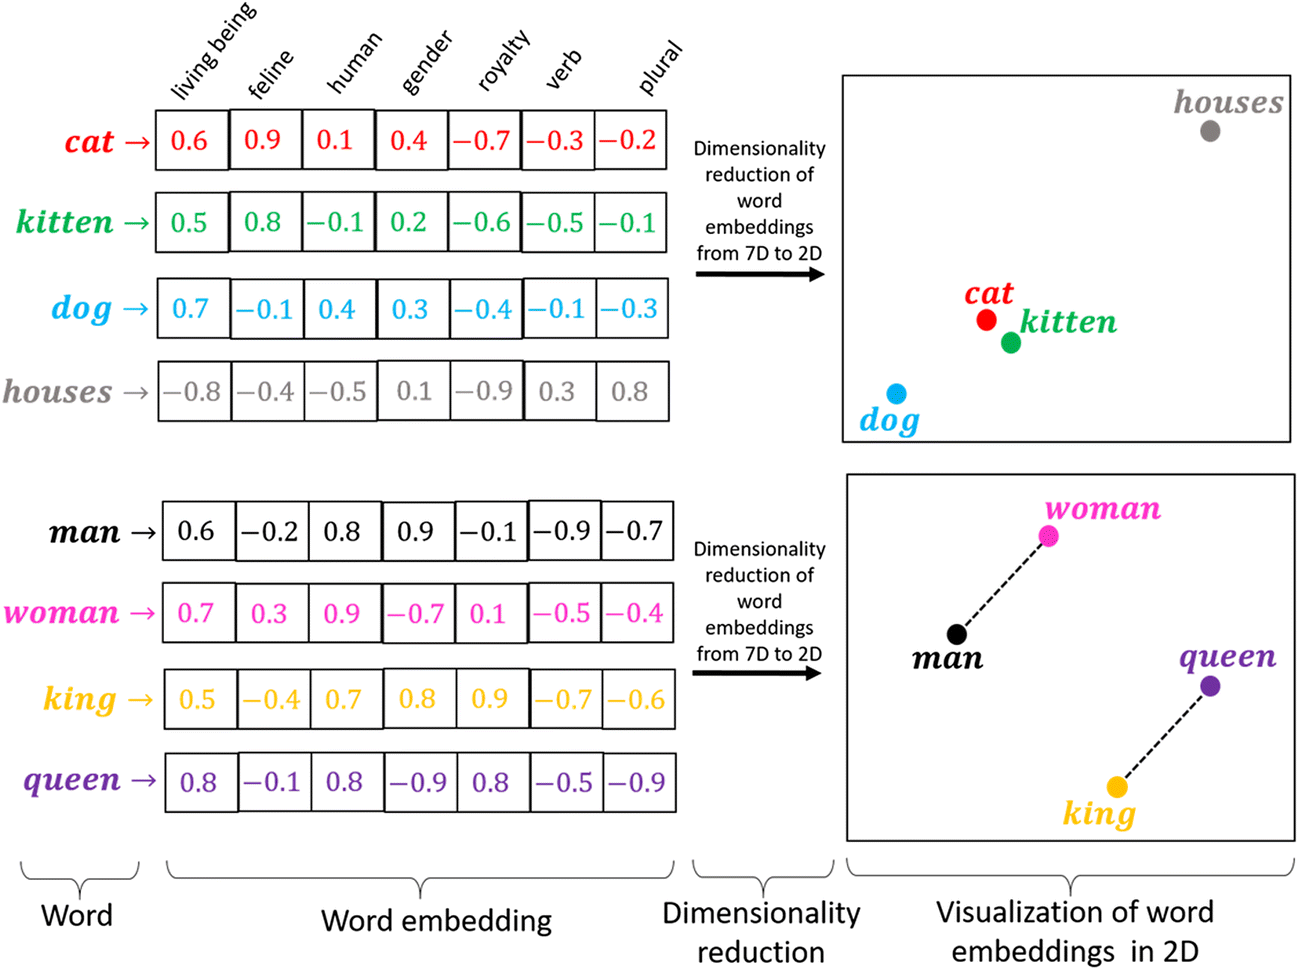

In [16]:
embedding_dim = 16
# it means that each word in your vocabulary will be represented by a numerical vector of length 16.

During runtime, input text or messages entered by the user, a 16-dimensional array represents text data in numerical vectors. 


[[3, 4, 5, 6], [7, 8, 9, 10], [11, 12]]

In [17]:
#maximum length 20 words for a sequence
max_len = 20

The max_len = 20 parameter specifies that the maximum length allowed for a sequence (i.e., a user query or message) is 20 words or tokens. If a query or message exceeds this length, it will be truncated or shortened to fit within the specified maximum length during the training process.

# Out of vocabulary 

In [18]:

oov_token = "<OOV>"


During the text-to-sequence conversion process, the tokenizer converts words or tokens from the training data (intents) into numerical sequences. However, there may be words or tokens that are not present in the tokenizer's vocabulary, referred to as "out of vocabulary" (OOV) words.

To handle OOV words, the oov_token parameter is used. It specifies a special token, "<OOV>" in this case, which will be assigned to any word or token that is not found in the tokenizer's vocabulary. This allows the chatbot to represent and process OOV words in a consistent manner during training, ensuring that they are not completely ignored or lost in the sequence encoding process.

# Tokenizer

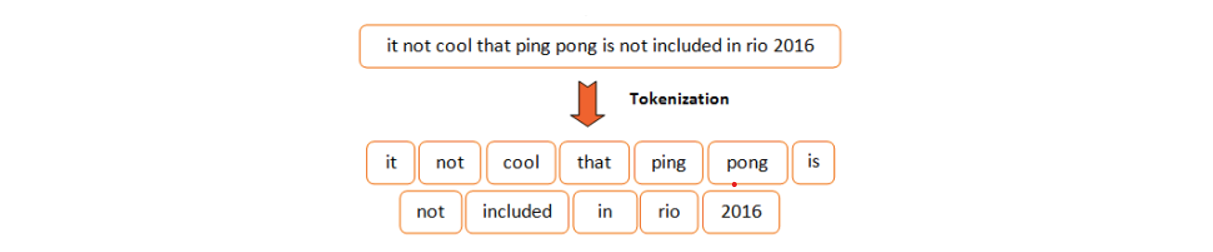

In [19]:
#tokenizer object of class Tokenizer
tokenizer = Tokenizer(num_words=1000, oov_token=oov_token)

An object named **tokenizer** of the **Tokenizer class** is created. It is used to tokenize and encode the text data.
The num_words parameter is set to 1000, which means the tokenizer will only encode the 1000 most frequently occurring words.

In [20]:

tokenizer.fit_on_texts(training_sentences)

The tokenizer object is fitted on the 'training_sentences list' to create a vocabulary. Each word in the
vocabulary is assigned a unique numerical value, and a word_index dictionary is created.
It allows mapping words to their numerical representations during tokenization.

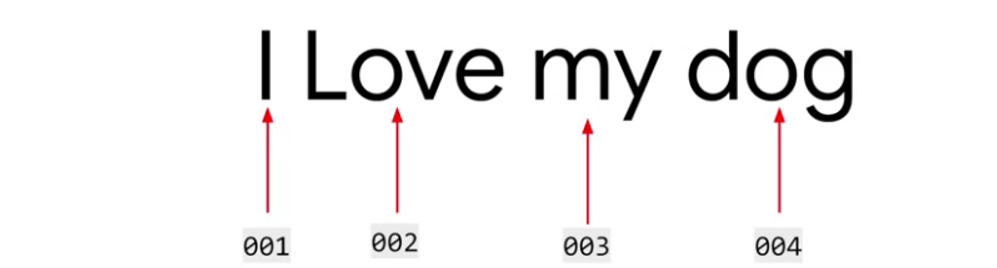

In [21]:
#convert text sequences in training_sentences into numerical sequences."
sequences = tokenizer.texts_to_sequences(training_sentences)

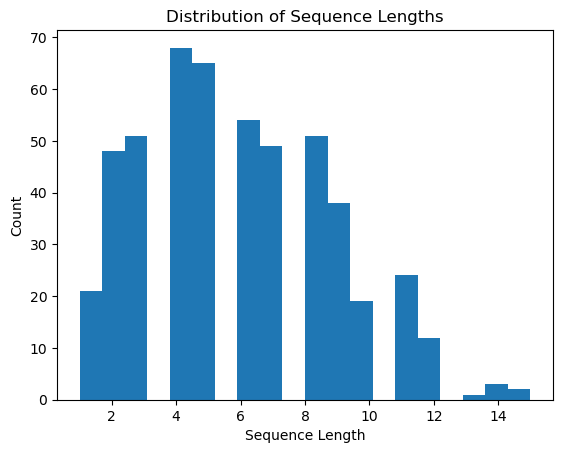

In [23]:
# Analyze sequence lengths
sequence_lengths = [len(seq) for seq in sequences]
plt.hist(sequence_lengths, bins=20)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.show()

In [25]:

#all sequences have the same length for consistency in model training and input requirements.

padded_sequences = pad_sequences(sequences, maxlen=max_len)


In [26]:
padded_sequences

array([[  0,   0,   0, ...,   0,   0, 135],
       [  0,   0,   0, ...,   0, 135,  33],
       [  0,   0,   0, ...,   0,   0, 165],
       ...,
       [  0,   0,   0, ...,  26,   4,   2],
       [  0,   0,   0, ...,  28,  13,   9],
       [  0,   0,   0, ..., 134,   4,   2]])

# Sequential Model


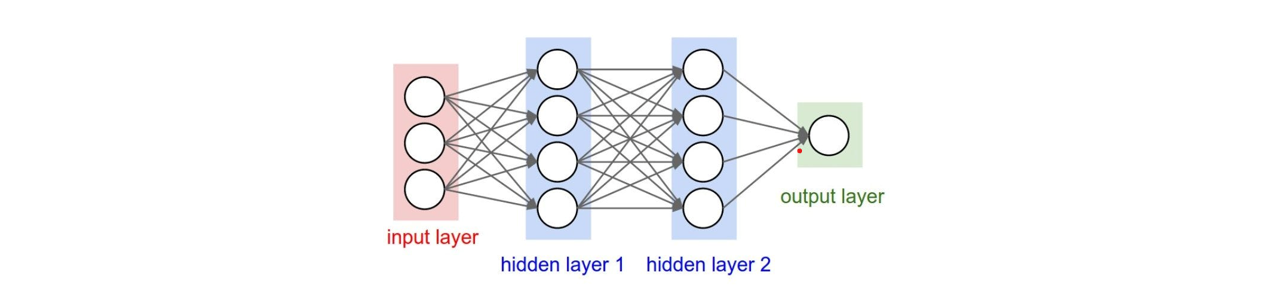

This creates a new sequential model, which is a linear stack of layers. It allows us to build the model layer by layer.

# Task 8 & 9: Choose Machine Learning Algorithms and Justify
- The code uses a neural network model, which is suitable for sequence data like text.
- The chosen architecture includes an embedding layer, global average pooling, and dense layers.
- The 'softmax' activation in the output layer indicates a multi-class classification problem.

# 1st layer

In [28]:
#Creates a linear stack of layers model. 
model = Sequential()

#1st layer
model.add(Embedding(1000, embedding_dim, input_length=max_len))

The Embedding layer is used in natural language processing tasks to learn and represent word embeddings. It maps each word in a text sequence to a dense vector representation, capturing semantic and contextual information. This layer helps the model learn relationships between words based on their embeddings, and it is a crucial component in NLP models.

# 2nd layer

In [29]:
#2nd layer
model.add(GlobalAveragePooling1D())

Global Average Pooling 1D layer takes outputs from the **previous layer and calculates the average value for each feature dimension across the sequence length.**

The GlobalAveragePooling1D layer performs spatial pooling by taking the average value across the entire sequence dimension of the input data. This pooling operation reduces the spatial dimensions of the data and produces a fixed-length representation.

In the context of the neural network model, this layer is typically added after one or more convolutional or recurrent layers. These preceding layers extract relevant features from the input data. The purpose of the GlobalAveragePooling1D layer is to condense the extracted features into a compact representation that can be fed to the subsequent layers, such as fully connected layers or output layers.

# 3rd layer

In [31]:
#3rd layer
model.add(Dense(37, activation='relu'))
model.add(Dense(37, activation='relu'))


- A Dense layer is a fully connected layer, where each neuron or node is connected to every neuron in the previous layer. The 16 parameter specifies the number of neurons in this layer. The choice of the number of neurons in a Dense layer depends on the complexity of the problem being solved and the size of the input data.

- activation='relu': This specifies the **activation function** for the neurons in the layer. In this case, the Rectified Linear Unit (ReLU) activation function is used. The ReLU activation function **introduces non-linearity** to the model by outputting the input for positive values and zero for negative values.

# 4th layer

In [32]:
#4th layer
model.add(Dense(num_classes, activation='softmax'))

### Input:

- The softmax function takes a vector of real numbers as input, often referred to as logits or scores. In the context of neural networks, these logits are typically the raw output of the network before applying any activation function.

### Exponentiation:

- Each element in the input vector is exponentiated (raised to the power of the constant 'e', the base of the natural logarithm). This has the effect of amplifying larger values and suppressing smaller values.

### Normalization:

- The exponentiated values are then normalized by dividing each of them by the sum of all the exponentiated values. This ensures that the resulting vector of values sums to 1, turning them into probabilities.

# Model's compilation

In [33]:
#The model's compilation is performed.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- The loss parameter is set to 'sparse_categorical_crossentropy', when the **labels are provided as integers.**
-  to minimize the loss function and improve the model's ability to make accurate predictions.
- The metrics parameter is set to ['accuracy'], indicating that the model's performance during training and evaluation will be measured using accuracy, which is the ratio of correct predictions to the total number of samples.

# Model Summary

In [ ]:
model.summary()

**The model.summary() function provides a summary of the neural network model, including information about the layers, their output shapes, and the total number of parameters in the model.** 

# Model Training and Progress

In [ ]:
epochs = 170
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs )



The chatbot model is trained using the fit() method. It takes the padded sequences as input, the corresponding training labels (transformed to numeric values), and the number of epochs for training. The training process is stored in the history variable.


# Displaying training history

In [ ]:
# Display training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Saving model 

In [ ]:
import pickle

model.save("cb_model_Alphaa")

# Save the tokenizer object to a pickle file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the label encoder object to a pickle file
with open('label_encoder.pickle', 'wb') as enc:
    pickle.dump(lbl_encoder, enc, protocol=pickle.HIGHEST_PROTOCOL)


# Task 10 & 11: Split Data, Train Models, and Evaluate Performance

In [ ]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, training_labels, test_size=0.2, random_state=42)

# Train the model on the training set
history = model.fit(X_train, np.array(y_train), epochs=10, verbose=0)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, np.array(y_test))
print(f'\n Test Accuracy: {test_accuracy}')

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model
def create_model(embedding_dim, num_classes):
    model = Sequential()
    model.add(Embedding(1000, embedding_dim, input_length=max_len))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on your model
model = KerasClassifier(build_fn=create_model, epochs=epochs, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'embedding_dim': [16, 32],
    'batch_size': [32, 64],
    'num_classes': [len(np.unique(training_labels))]  
}




In [ ]:
# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(padded_sequences, np.array(training_labels))


In [ ]:
# Display the best hyperparameters
print("Best Hyperparameters: ", grid_result.best_params_)

In [ ]:
best_hyperparameters = grid_result.best_params_

final_model = create_model(embedding_dim=best_hyperparameters['embedding_dim'], num_classes=best_hyperparameters['num_classes'])

# Train the final model on the entire dataset
new_histroy=final_model.fit(padded_sequences,np.array(training_labels), epochs=170)

In [ ]:
# Plot accuracy
plt.plot(new_histroy.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(new_histroy.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Saving Model

In [ ]:
import pickle

final_model.save("final_model")

# Save the tokenizer object to a pickle file
with open('tokenizer_final.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the label encoder object to a pickle file
with open('label_encoder_final.pickle', 'wb') as enc:
    pickle.dump(lbl_encoder, enc, protocol=pickle.HIGHEST_PROTOCOL)